In [27]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [28]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Clases y demás

## Encontrar las veces que se repite un personaje

### Una clase para ver cuántas líneas de diálogo tienen los 10 personajes más repetidos

In [29]:
class ContadorPersonajesRepetidos:
    def __init__(self, dataset_path):
        self.dataset = pd.read_csv(dataset_path)

    def contar_personajes_repetidos(self, num_personajes=10):
        # Contar la frecuencia de los personajes
        frecuencia_personajes = self.dataset['character'].value_counts()

        # Seleccionar los quince personajes más repetidos
        quince_personajes_mas_repetidos = frecuencia_personajes.head(num_personajes)

        # Crear un nuevo DataFrame con los quince personajes y sus repeticiones
        personajes_repetidos_15 = pd.DataFrame({'Personaje': quince_personajes_mas_repetidos.index, 'Repeticiones': quince_personajes_mas_repetidos.values})

        return personajes_repetidos_15

### Una clase para ver las veces que esos personajes son mencionados en los diálogos

In [31]:
class ContadorNombresEnDialogo:
    def __init__(self, dataset_path, palabras_a_buscar):
        self.dataset = pd.read_csv(dataset_path)
        self.palabras_a_buscar = [palabra.lower() for palabra in palabras_a_buscar]

    def contar_repeticiones(self):
        # Convertir el contenido de la columna "dialog" a minúsculas
        self.dataset['dialog'] = self.dataset['dialog'].str.lower()

        # Inicializar un diccionario para almacenar las repeticiones de cada palabra
        repeticiones = {palabra.capitalize(): [] for palabra in self.palabras_a_buscar}

        # Contar la frecuencia de cada palabra en todas las líneas de diálogo
        for palabra in self.palabras_a_buscar:
            repeticiones[palabra.capitalize()] = [len(re.findall(rf'\b{re.escape(palabra)}\b', dialog)) for dialog in self.dataset['dialog']]

        # Crear un DataFrame con los resultados
        resultado_df = pd.DataFrame({'Palabra': [palabra.capitalize() for palabra in self.palabras_a_buscar], 'Repeticiones': [sum(repeticiones[palabra.capitalize()]) for palabra in self.palabras_a_buscar]})
        
        # Calcular el sumatorio de repeticiones
        sumatorio_repeticiones = resultado_df['Repeticiones'].sum()

        # Agregar el sumatorio al DataFrame de resultados
        resultado_df = pd.concat([resultado_df, pd.DataFrame({'Palabra': ['Sumatorio'], 'Repeticiones': [sumatorio_repeticiones]})], ignore_index=True)

        return resultado_df

## Personajes más relevantes

In [32]:
if __name__ == "__main__":
    contador = ContadorPersonajesRepetidos('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv')
    resultados_personajes = contador.contar_personajes_repetidos()

resultados_personajes

,Personaje,Repeticiones
0,Harry Potter,242
1,Ron Weasley,142
2,Hermione Granger,97
3,Rubeus Hagrid,86
4,Minerva McGonagall,31
5,Vernon Dursley,25
6,Albus Dumbledore,24
7,Neville Longbottom,18
8,Petunia Dursley,17
9,Dudley Dursley,17


### Formas de referirse a los personajes más relevantes

In [33]:
palabras_a_buscar_harry = ["harry potter", "harry", "the boy who lived", "the chosen one", "potter", "mr. potter", "the gryffindor seeker", "harry james potter"]
palabras_a_buscar_ron = ["ron", "ron weasley", "ronald", "ronald weasley", "the ginger", "ronniekins", "ginger nut", "the weasley boy", "won-won"]
palabras_a_buscar_hermione = ["hermione granger", "hermione", "granger", "miss granger", "hermione jean granger", "the brightest witch of her age", "the smart one"]
palabras_a_buscar_hagrid = ["hagrid", "rubeus hagrid", "keeper of keys and grounds", "keeper of the keys", "keeper of the grounds", "gamekeeper", "hagrid the giant", "fang's owner", "half-giant"]
palabras_a_buscar_mcgonagall = ["professor mcgonagall", "mcgonagall", "minerva", "minerva mcgonagall", "deputy headmistress", "transfiguration professor", "mcg", "head of gryffindor"]
palabras_a_buscar_vernon = ["mr. dursley", "uncle vernon", "vernon", "petunia's husband", "muggle husband"]
palabras_a_buscar_dumbledore = ["albus percival wulfric brian dumbledore", "professor dumbledore", "dumbledore", "albus dumbledore", "headmaster", "chief warlock of the wizengamot", "the old professor", "the wise one", "albus", "the headmaster of hogwarts"]
palabras_a_buscar_neville = ["neville", "longbottom", "mr. longbottom", "neville longbottom", "the other chosen one"]
palabras_a_buscar_petunia = ["petunia dursley", "mrs. dursley", "aunt petunia", "petunia", "harry's aunt", "petunia evans", "the dursley woman", "the muggle aunt", "lily's sister"]
palabras_a_buscar_dudley = ["dudley", "dudley dursley", "dudders", "dudleykins", "the son of vernon and petunia", "harry's cousin", "big d", "dudley the bully", "the spoiled boy", "the muggle cousin"]

#### Harry Potter - 166 veces

In [34]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_harry
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_harry = contador.contar_repeticiones()

resultados_harry

,Palabra,Repeticiones
0,Harry potter,15
1,Harry,95
2,The boy who lived,1
3,The chosen one,0
4,Potter,44
5,Mr. potter,11
6,The gryffindor seeker,0
7,Harry james potter,0
8,Sumatorio,166


#### Ron - 34 veces

In [35]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_ron
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_ron = contador.contar_repeticiones()

resultados_ron

,Palabra,Repeticiones
0,Ron,27
1,Ron weasley,2
2,Ronald,3
3,Ronald weasley,2
4,The ginger,0
5,Ronniekins,0
6,Ginger nut,0
7,The weasley boy,0
8,Won-won,0
9,Sumatorio,34


#### Hermione - 30 veces

In [36]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hermione
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_hermione = contador.contar_repeticiones()

resultados_hermione

,Palabra,Repeticiones
0,Hermione granger,3
1,Hermione,19
2,Granger,6
3,Miss granger,2
4,Hermione jean granger,0
5,The brightest witch of her age,0
6,The smart one,0
7,Sumatorio,30


#### Hagrid - 34 veces

In [37]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hagrid
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_hagrid = contador.contar_repeticiones()

resultados_hagrid

,Palabra,Repeticiones
0,Hagrid,32
1,Rubeus hagrid,1
2,Keeper of keys and grounds,1
3,Keeper of the keys,0
4,Keeper of the grounds,0
5,Gamekeeper,0
6,Hagrid the giant,0
7,Fang's owner,0
8,Half-giant,0
9,Sumatorio,34


#### McGonagall - 10 veces

In [38]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_mcgonagall
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_mcgonagall = contador.contar_repeticiones()

resultados_mcgonagall

,Palabra,Repeticiones
0,Professor mcgonagall,4
1,Mcgonagall,6
2,Minerva,0
3,Minerva mcgonagall,0
4,Deputy headmistress,0
5,Transfiguration professor,0
6,Mcg,0
7,Head of gryffindor,0
8,Sumatorio,10


#### Vernon - 3 veces

In [39]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_vernon
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_vernon = contador.contar_repeticiones()

resultados_vernon

,Palabra,Repeticiones
0,Mr. dursley,0
1,Uncle vernon,1
2,Vernon,2
3,Petunia's husband,0
4,Muggle husband,0
5,Sumatorio,3


#### Dumbledore - 35

In [40]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_dumbledore
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_dumbledore = contador.contar_repeticiones()

resultados_dumbledore

,Palabra,Repeticiones
0,Albus percival wulfric brian dumbledore,0
1,Professor dumbledore,6
2,Dumbledore,22
3,Albus dumbledore,2
4,Headmaster,1
5,Chief warlock of the wizengamot,0
6,The old professor,0
7,The wise one,0
8,Albus,4
9,The headmaster of hogwarts,0


#### Neville - 27 veces

In [41]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_neville
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_neville = contador.contar_repeticiones()

resultados_neville

,Palabra,Repeticiones
0,Neville,11
1,Longbottom,9
2,Mr. longbottom,6
3,Neville longbottom,1
4,The other chosen one,0
5,Sumatorio,27


#### Petunia - 2

In [42]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_petunia
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_petunia = contador.contar_repeticiones()

resultados_petunia

,Palabra,Repeticiones
0,Petunia dursley,0
1,Mrs. dursley,0
2,Aunt petunia,1
3,Petunia,1
4,Harry's aunt,0
5,Petunia evans,0
6,The dursley woman,0
7,The muggle aunt,0
8,Lily's sister,0
9,Sumatorio,2


#### Dudley - 4 veces

In [43]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_dudley
    contador = ContadorNombresEnDialogo('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv', palabras_a_buscar)
    resultados_dudley = contador.contar_repeticiones()

resultados_dudley

,Palabra,Repeticiones
0,Dudley,4
1,Dudley dursley,0
2,Dudders,0
3,Dudleykins,0
4,The son of vernon and petunia,0
5,Harry's cousin,0
6,Big d,0
7,Dudley the bully,0
8,The spoiled boy,0
9,The muggle cousin,0


### Continuación

#### Añadimos los resultados al dataframe original

In [44]:
resultados = [166, 34, 30, 34, 10, 3, 35, 27, 2, 4]

Añadimos columna

In [45]:
resultados_personajes['Menciones'] = resultados
resultados_personajes

,Personaje,Repeticiones,Menciones
0,Harry Potter,242,166
1,Ron Weasley,142,34
2,Hermione Granger,97,30
3,Rubeus Hagrid,86,34
4,Minerva McGonagall,31,10
5,Vernon Dursley,25,3
6,Albus Dumbledore,24,35
7,Neville Longbottom,18,27
8,Petunia Dursley,17,2
9,Dudley Dursley,17,4


Sumamos las columnas

In [46]:
resultados_personajes['Total'] = resultados_personajes['Repeticiones'] + resultados_personajes['Menciones']
resultados_personajes

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,242,166,408
1,Ron Weasley,142,34,176
2,Hermione Granger,97,30,127
3,Rubeus Hagrid,86,34,120
4,Minerva McGonagall,31,10,41
5,Vernon Dursley,25,3,28
6,Albus Dumbledore,24,35,59
7,Neville Longbottom,18,27,45
8,Petunia Dursley,17,2,19
9,Dudley Dursley,17,4,21


Re-ordenamos las columnas

In [47]:
resultados_personajes = resultados_personajes.sort_values(by='Total', ascending=False)
resultados_personajes = resultados_personajes.reset_index(drop=True)
resultados_personajes # podemos observar cambios en el orden

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,242,166,408
1,Ron Weasley,142,34,176
2,Hermione Granger,97,30,127
3,Rubeus Hagrid,86,34,120
4,Albus Dumbledore,24,35,59
5,Neville Longbottom,18,27,45
6,Minerva McGonagall,31,10,41
7,Vernon Dursley,25,3,28
8,Dudley Dursley,17,4,21
9,Petunia Dursley,17,2,19


Filtramos solo por el total

In [48]:
resultados_personajes = resultados_personajes[['Personaje', 'Total']]
resultados_personajes

,Personaje,Total
0,Harry Potter,408
1,Ron Weasley,176
2,Hermione Granger,127
3,Rubeus Hagrid,120
4,Albus Dumbledore,59
5,Neville Longbottom,45
6,Minerva McGonagall,41
7,Vernon Dursley,28
8,Dudley Dursley,21
9,Petunia Dursley,19


Vamos a hacer una gráfica

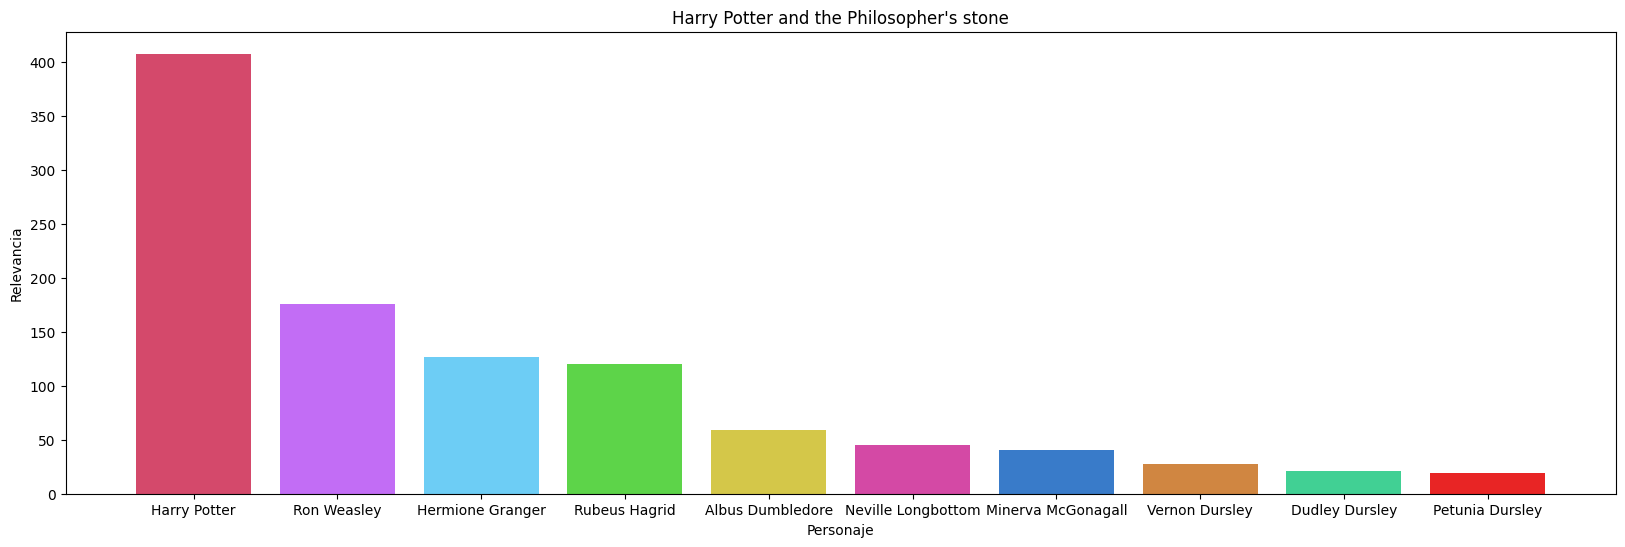

In [58]:
personajes = resultados_personajes['Personaje']
total = resultados_personajes['Total']

colores = ['#D4496B', '#C26DF5', '#6DCDF5', '#5DD449', '#D4C749', '#D449A5', '#397BC9', '#D08641', '#41D094', '#E82525']

plt.figure(figsize=(20, 6))
plt.bar(personajes, total, color=colores)


plt.xlabel('Personaje')
plt.ylabel('Relevancia')
plt.title("Harry Potter and the Philosopher's stone")

plt.show()

Sacamos cvs para no perder los datos

In [54]:
resultados_personajes.to_csv('csv/Personajes_relevantes/HP_1.csv', index=False)


## Hechizos más usados por personajes relevantes

Sacamos los hechizos en una lista y los pasamos a minúsculas

In [81]:
hechizos = pd.read_csv('csv/hechizos.csv') # compruebo que está ok
incantation_list = hechizos['Incantation'].tolist()
incantation_list = [palabra.lower() for palabra in incantation_list]
incantation_list

['accio',
 'aguamenti',
 'alarte ascendare',
 'alohomora',
 'arania exumai',
 'arresto momentum',
 'avada kedavra',
 'bombarda',
 'brackium emendo',
 'cistem aperio',
 'colloportus',
 'confringo',
 'crucio',
 'diffindo',
 'dissendium',
 'engorgio',
 'episkey',
 'expecto patronum',
 'expelliarmus',
 'expulso',
 'finite',
 'homenum revelio',
 'immobulus',
 'impedimenta',
 'imperio',
 'incarcerous',
 'incendio',
 'levicorpus',
 'locomotor',
 'locomotor mortis',
 'lumos',
 'lumos maxima',
 'lumos solem',
 'muffliato',
 'nox',
 'obliviate',
 'oculus reparo',
 'oppugno',
 'peskipiksi pesternomi',
 'petrificus totalus',
 'piertotum locomotor',
 'portus',
 'priori incantatem',
 'protego',
 'protego maxima',
 'protego totalum',
 'reducio',
 'relashio',
 'reparo',
 'repello inimicum',
 'repello muggletum',
 'revelio',
 'rictusempra',
 'riddikulus',
 'salvio hexia',
 'sectumsempra',
 'serpensortia',
 'stupefy',
 'vera verto',
 'vipera evanesca',
 'wingardium leviosa']

Hacemos lo mismo con los 10 personajes más relevantes de esta película

In [60]:
personajes_lista = resultados_personajes['Personaje'].tolist()
personajes_lista

['Harry Potter',
 'Ron Weasley',
 'Hermione Granger',
 'Rubeus Hagrid',
 'Albus Dumbledore',
 'Neville Longbottom',
 'Minerva McGonagall',
 'Vernon Dursley',
 'Dudley Dursley',
 'Petunia Dursley']

Vamos a filtrar los diálogos para quedarnos solo con los de los 10 personajes relevantes

In [61]:
df = pd.read_csv('csv/1_Harry_Potter_and_the_Philosophers_Stone.csv')

df_filtrado = df[df['character'].isin(personajes_lista)]

df_filtrado

,movie,chapter,character,dialog
0,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,I should have known that you would be here...P...
1,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru..."
2,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
3,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva McGonagall,And the boy?
4,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus Dumbledore,Hagrid is bringing him.
...,...,...,...,...
880,Harry Potter and the Philosopher's Stone,Not Really Going Home,Rubeus Hagrid,"Oh. Go on...on with you. Oh, listen, Harry, i..."
881,Harry Potter and the Philosopher's Stone,Not Really Going Home,Harry Potter,"But Hagrid, we're not allowed to do magic away..."
882,Harry Potter and the Philosopher's Stone,Not Really Going Home,Rubeus Hagrid,"I do. But your cousin don't, do he? Eh? Off y..."
883,Harry Potter and the Philosopher's Stone,Not Really Going Home,Hermione Granger,"Feels strange to be going home, doesn't it?"


Para comprobar que se ha hecho bien, vamos a sacar los valores únicos de los personajes

In [63]:
df_filtrado['character'].unique()


array(['Albus Dumbledore', 'Minerva McGonagall', 'Rubeus Hagrid',
       'Petunia Dursley', 'Dudley Dursley', 'Vernon Dursley',
       'Harry Potter', 'Ron Weasley', 'Hermione Granger',
       'Neville Longbottom'], dtype=object)

Una vez tenemos los diálogos filtrados, vamos a buscar los hechizos más usados por cada uno de ellos

#### Harry - 0 hechizos

Filtramos para quedarnos solo con los de Harry y los pasamos a minúsculas

In [84]:
df_harry_potter = df_filtrado[df_filtrado['character'] == 'Harry Potter']
df_harry_potter['dialog'] = df_harry_potter['dialog'].str.lower()
df_harry_potter


/var/folders/vk/039ctwds73s7fmf6nwr85rm80000gn/T/ipykernel_88547/4282211716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_harry_potter['dialog'] = df_harry_potter['dialog'].str.lower()


,movie,chapter,character,dialog
21,Harry Potter and the Philosopher's Stone,The Vanishing Glass,Harry Potter,"yes, aunt petunia."
24,Harry Potter and the Philosopher's Stone,The Vanishing Glass,Harry Potter,"yes, uncle vernon."
37,Harry Potter and the Philosopher's Stone,The Vanishing Glass,Harry Potter,he's asleep!
39,Harry Potter and the Philosopher's Stone,The Vanishing Glass,Harry Potter,sorry about him. he doesn't understand what it...
43,Harry Potter and the Philosopher's Stone,The Vanishing Glass,Harry Potter,anytime.
...,...,...,...,...
867,Harry Potter and the Philosopher's Stone,Mark of Love,Harry Potter,all right. hermione?
877,Harry Potter and the Philosopher's Stone,Not Really Going Home,Harry Potter,one minute.
879,Harry Potter and the Philosopher's Stone,Not Really Going Home,Harry Potter,"thanks, hagrid."
881,Harry Potter and the Philosopher's Stone,Not Really Going Home,Harry Potter,"but hagrid, we're not allowed to do magic away..."


In [85]:
repeticiones = {}

# Inicializar el diccionario con 0 para cada hechizo
for hechizo in incantation_list:
    repeticiones[hechizo] = 0

# Recorrer los diálogos y contar las repeticiones de las incantaciones
for dialogo in df_harry_potter['dialog']:
    palabras = dialogo.split()  # Dividir el diálogo en palabras
    for palabra in palabras:
        palabra = palabra.strip('.,!?')  # Eliminar signos de puntuación
        if palabra in repeticiones:
            repeticiones[palabra] += 1

# Crear un DataFrame a partir del diccionario de repeticiones
resultado_hechizos_harry = pd.DataFrame({'Incantation': repeticiones.keys(), 'Repeticiones': repeticiones.values()})
resultado_hechizos_harry

,Incantation,Repeticiones
0,accio,0
1,aguamenti,0
2,alarte ascendare,0
3,alohomora,0
4,arania exumai,0
...,...,...
56,serpensortia,0
57,stupefy,0
58,vera verto,0
59,vipera evanesca,0


Quitamos los ceros para ver cuántos se repiten

In [86]:
resultado_hechizos_harry = resultado_hechizos_harry[resultado_hechizos_harry['Repeticiones'] != 0]
resultado_hechizos_harry

,Incantation,Repeticiones


#### Hermione -

In [78]:
df_hermione = df_filtrado[df_filtrado['character'] == 'Hermione Granger']
df_hermione['dialog'] = df_hermione['dialog'].str.lower()
df_hermione

/var/folders/vk/039ctwds73s7fmf6nwr85rm80000gn/T/ipykernel_88547/2717808514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hermione['dialog'] = df_hermione['dialog'].str.lower()


,movie,chapter,character,dialog
221,Harry Potter and the Philosopher's Stone,Ron and Hermione,Hermione Granger,has anyone seen a toad? a boy named neville's ...
223,Harry Potter and the Philosopher's Stone,Ron and Hermione,Hermione Granger,"oh, are you doing magic? let's see then."
225,Harry Potter and the Philosopher's Stone,Ron and Hermione,Hermione Granger,"are you sure that's a real spell? well, it's n..."
227,Harry Potter and the Philosopher's Stone,Ron and Hermione,Hermione Granger,pleasure. you two better change into your robe...
240,Harry Potter and the Philosopher's Stone,The Sorting Hat,Hermione Granger,"it's not real, the ceiling. it's just bewitche..."
...,...,...,...,...
823,Harry Potter and the Philosopher's Stone,Sacrifice Play,Hermione Granger,me? books and cleverness? there are more impor...
868,Harry Potter and the Philosopher's Stone,Mark of Love,Hermione Granger,never better.
870,Harry Potter and the Philosopher's Stone,House Cup Winner,Hermione Granger,we're tied with slytherin!
876,Harry Potter and the Philosopher's Stone,Not Really Going Home,Hermione Granger,"come on, harry."


In [82]:
repeticiones = {}

# Inicializar el diccionario con 0 para cada hechizo
for hechizo in incantation_list:
    repeticiones[hechizo] = 0

# Recorrer los diálogos y contar las repeticiones de las incantaciones
for dialogo in df_hermione['dialog']:
    palabras = dialogo.split()  # Dividir el diálogo en palabras
    for palabra in palabras:
        palabra = palabra.strip('.,!?')  # Eliminar signos de puntuación
        if palabra in repeticiones:
            repeticiones[palabra] += 1

# Crear un DataFrame a partir del diccionario de repeticiones
resultado_hechizos_hermione = pd.DataFrame({'Incantation': repeticiones.keys(), 'Repeticiones': repeticiones.values()})
resultado_hechizos_hermione

,Incantation,Repeticiones
0,accio,0
1,aguamenti,0
2,alarte ascendare,0
3,alohomora,2
4,arania exumai,0
...,...,...
56,serpensortia,0
57,stupefy,0
58,vera verto,0
59,vipera evanesca,0


In [87]:
resultado_hechizos_hermione = resultado_hechizos_hermione[resultado_hechizos_hermione['Repeticiones'] != 0]
resultado_hechizos_hermione

,Incantation,Repeticiones
3,alohomora,2
48,reparo,1
